<a href="https://colab.research.google.com/github/felipedidier/br-classification-project/blob/master/classification-project-br.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.imgur.com/JsMvGnP.png)

# Projeto - Classificação

## 1. Considerações iniciais

Neste notebook iremos praticar a construção de um modelo de Machine Learning. Na atividade, iremos utilizar um algoritmo para realizar um processo de classificação. 

Como o foco da atividade será percorrer o fluxo do Aprendizado de Máquina por inteiro (ou o máximo dele), evitaremos, propositalmente, adentrar em algoritmos e explicações mais complexas.


### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes que interrompem suas assinaturas de um serviço dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

Os dados necessários podem ser encontrados no [repositório da atividade](https://github.com/awarischool/br-classification-project). No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

### 3.1 Análise exploratória

In [248]:
# seu código
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

#Pre processamento
## Escalonamento de features
from sklearn.preprocessing import StandardScaler, OneHotEncoder
##Selecionar as melhores features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#Modelo
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, plot_confusion_matrix, auc, roc_auc_score

In [3]:
# seu código
df = pd.read_csv('https://raw.githubusercontent.com/felipedidier/br-classification-project/master/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
df.drop(columns='RowNumber', inplace=True)

In [9]:
df.shape

(10000, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [11]:
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [22]:
list(df.columns)

['CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [107]:
feat_num = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
feat_cat = ['CustomerId', 'Gender', 'Geography', 'Surname']

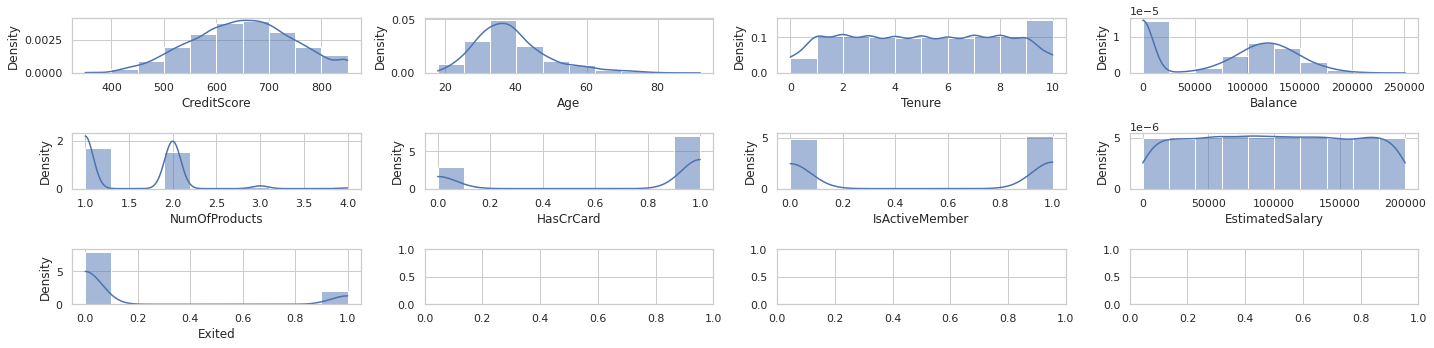

In [55]:
fig, axes = plt.subplots(nrows=3, ncols=4)
fig.set_size_inches(20,5)

for i, column in enumerate(feat_num):
  sns.histplot(df[column], ax=axes[i//4,i%4], bins=10, stat='density', kde=True)
fig.tight_layout()

In [37]:
aband = df.Exited == 1
retido = df.Exited == 0

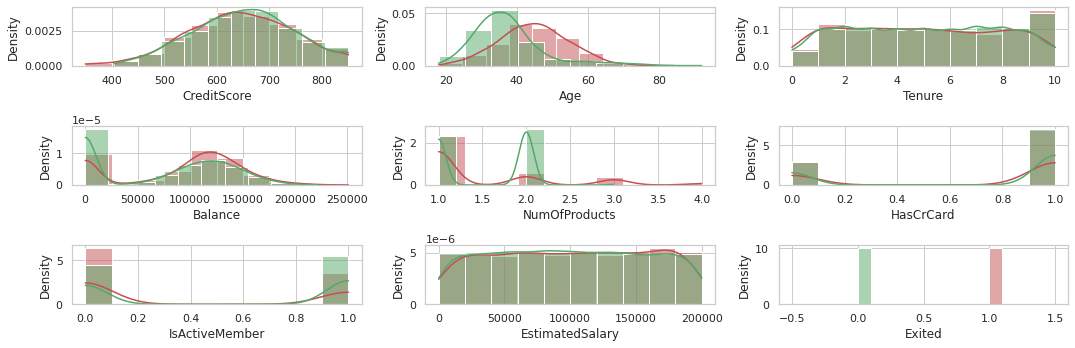

In [93]:
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(15,5)

for i, column in enumerate(feat_num):
  sns.histplot(df[column][aband], ax=axes[i//3,i%3], bins=10, stat='density', kde=True, color='r')
  sns.histplot(df[column][retido], ax=axes[i//3,i%3], bins=10, stat='density', kde=True, color='g')

fig.tight_layout()

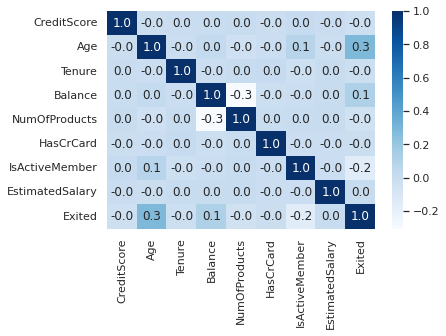

In [84]:
sns.heatmap(df[feat_num].corr(), annot=True, fmt='.1f', cmap='Blues')

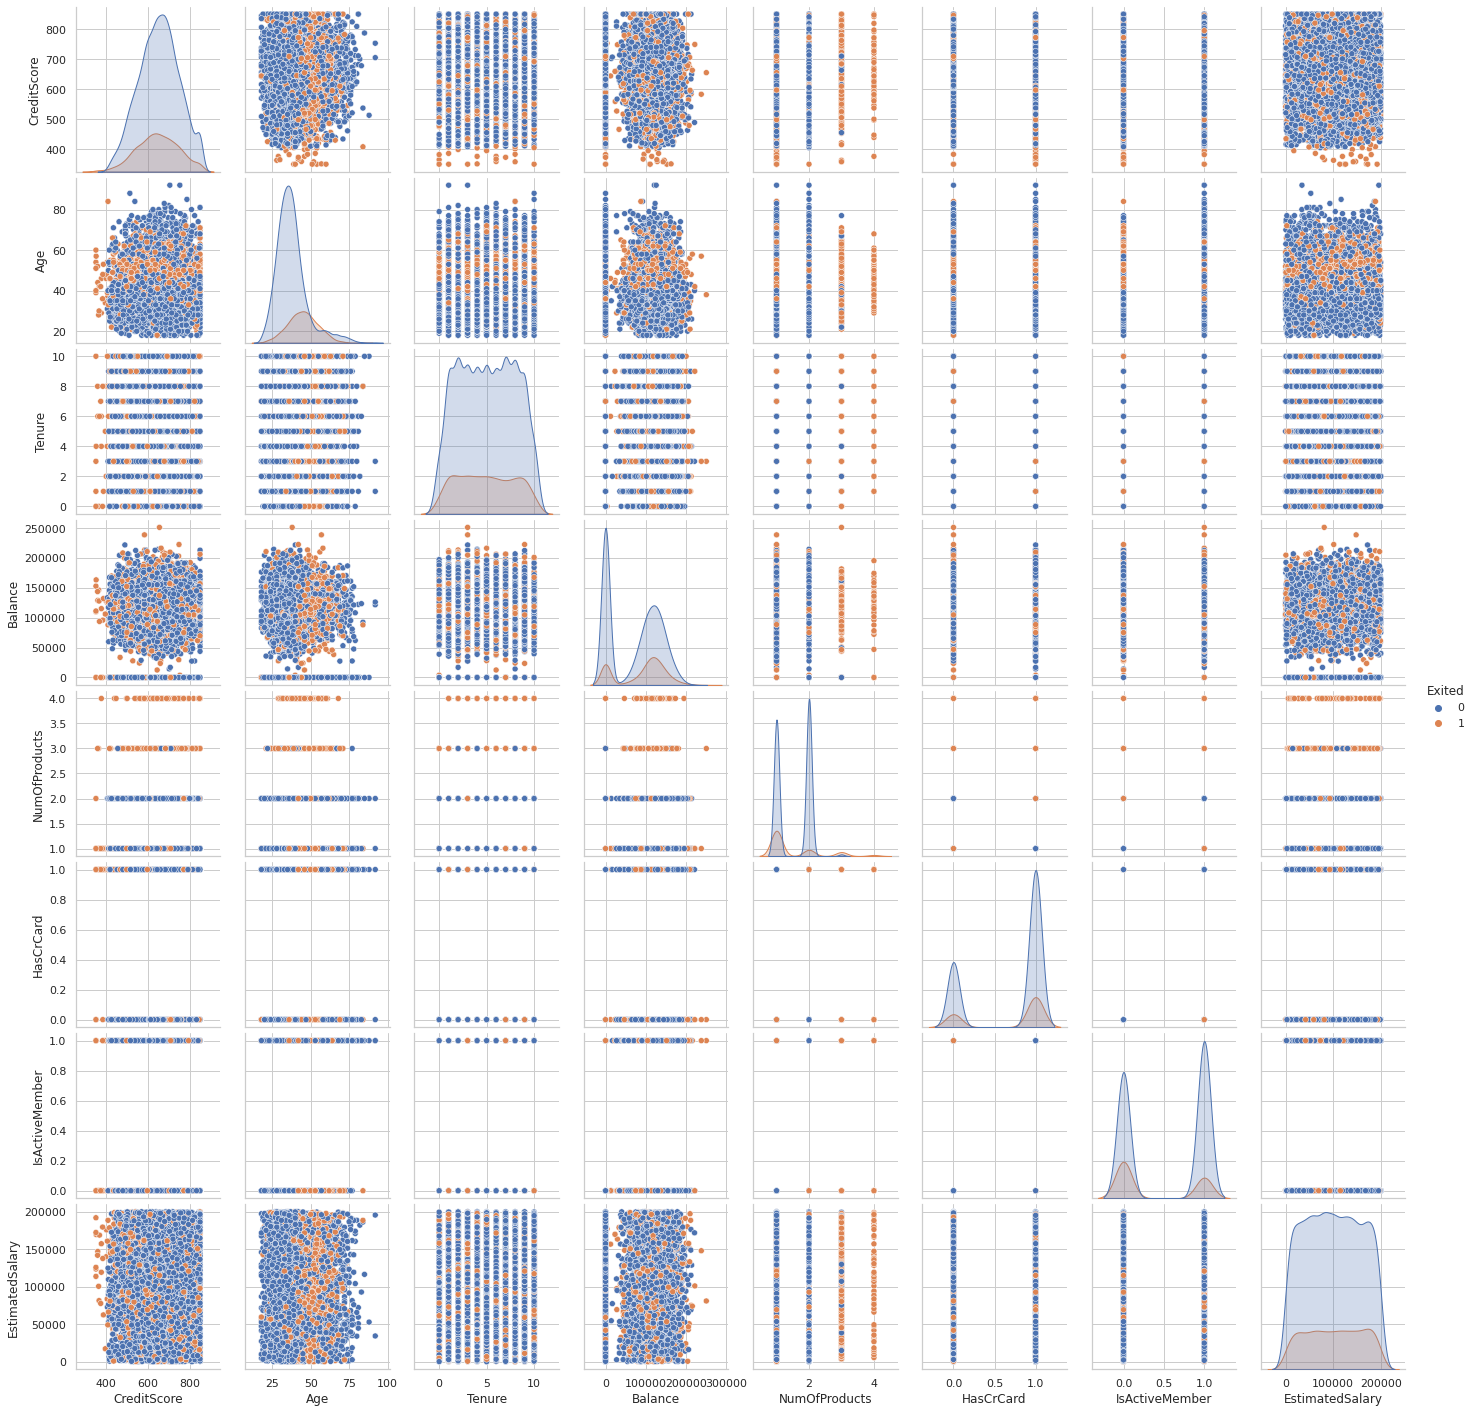

In [59]:
sns.pairplot(df[feat_num], hue='Exited')

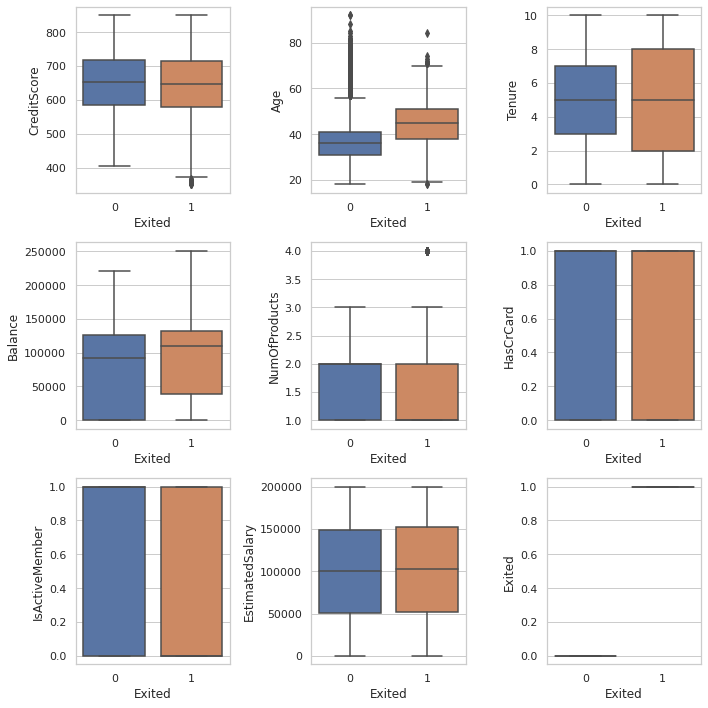

In [82]:
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(10,10)

for i, column in enumerate(feat_num):
  sns.boxplot(y = df[feat_num][column], x=df[feat_num]['Exited'], ax=axes[i//3,i%3], orient="v")

fig.tight_layout()

### 3.2 Preparação e limpeza dos dados

In [111]:
df2 = df.copy()

In [114]:
df2.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [112]:
for i in feat_cat:
  print(i, df[i].value_counts().count())

CustomerId 10000
Gender 2
Geography 3
Surname 2932


In [113]:
# Baseado no resultado, OneHotEncoder será aplicado para  Gender e Geography
one_hot = OneHotEncoder()

In [115]:
for col in ['Gender', 'Geography']:
  one_hot_data = one_hot.fit_transform(df[[col]]).toarray()
  one_hot_columname = one_hot.get_feature_names([col])
  df_onehot = pd.DataFrame(one_hot_data, columns = one_hot_columname)
  df2 = df2.drop(columns = col).join(df_onehot)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [116]:
df2.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,1.0,0.0,0.0
1,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1.0,0.0,0.0,0.0,1.0
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,1.0,0.0,0.0
3,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,1.0,0.0,0.0
4,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,1.0,0.0,0.0,0.0,1.0


In [117]:
# seu código
z_score = StandardScaler()
def std_z_scale(df,col):
  df2[col] = z_score.fit_transform(df[[col]])

In [118]:
feat_z_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

In [119]:
for feat in feat_z_scale:
  std_z_scale(df,feat)

In [120]:
df2.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,15634602,Hargrave,-0.326221,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1,1.0,0.0,1.0,0.0,0.0
1,15647311,Hill,-0.440036,0.198164,-1.387538,0.117350,1,0,1,0.216534,0,1.0,0.0,0.0,0.0,1.0
2,15619304,Onio,-1.536794,0.293517,1.032908,1.333053,3,1,0,0.240687,1,1.0,0.0,1.0,0.0,0.0
3,15701354,Boni,0.501521,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0,1.0,0.0,1.0,0.0,0.0
4,15737888,Mitchell,2.063884,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0,1.0,0.0,0.0,0.0,1.0


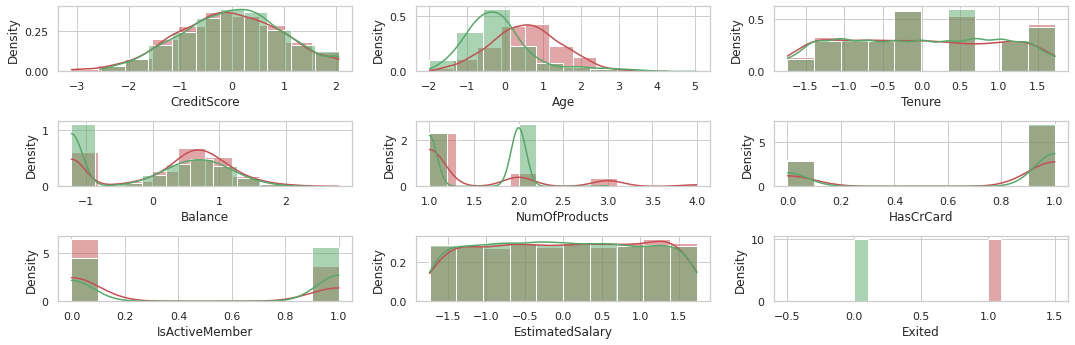

In [94]:
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(15,5)

for i, column in enumerate(feat_num):
  sns.histplot(df2[column][aband], ax=axes[i//3,i%3], bins=10, stat='density', kde=True, color='r')
  sns.histplot(df2[column][retido], ax=axes[i//3,i%3], bins=10, stat='density', kde=True, color='g')

fig.tight_layout()

In [123]:
df2.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Gender_Female', 'Gender_Male', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

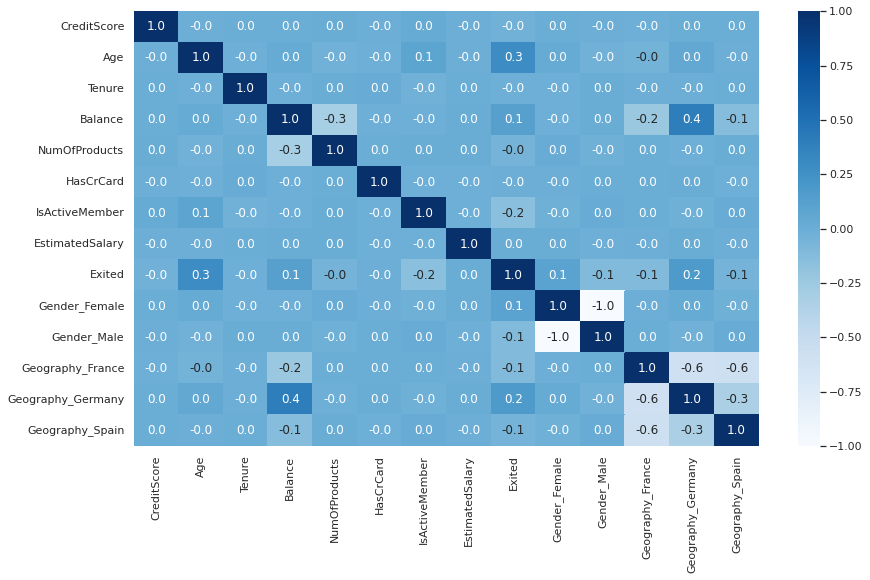

In [126]:
plt.figure(figsize=(14,8))
sns.heatmap(df2.drop(columns=['CustomerId', 'Surname']).corr(), annot=True, fmt='.1f', cmap='Blues')

### 3.3 Seleção de atributos

In [175]:
feat_trans = list(df2.drop(columns=['Surname', 'CustomerId', 'Exited']).columns)

df_feat = df2[feat_trans]

In [176]:
# seu código
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(df_feat[feat_trans],df2['Exited'])

SelectKBest(k='all')

In [166]:
# como o resultado é em array, converter para dataframe
scores = pd.DataFrame(data = feat_trans, columns = ['feat_name']).join(pd.DataFrame(data=fs.scores_, columns=['score']))
scores.sort_values(by='score', ascending=False, inplace=True)
scores.reset_index(inplace=True)
scores

,index,feat_name,score
0,1,Age,886.063275
1,11,Geography_Germany,310.258384
2,6,IsActiveMember,249.800794
3,3,Balance,142.473832
4,8,Gender_Female,114.727989
5,9,Gender_Male,114.727989
6,10,Geography_France,111.360517
7,12,Geography_Spain,27.809468
8,4,NumOfProducts,22.915223
9,0,CreditScore,7.344522


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


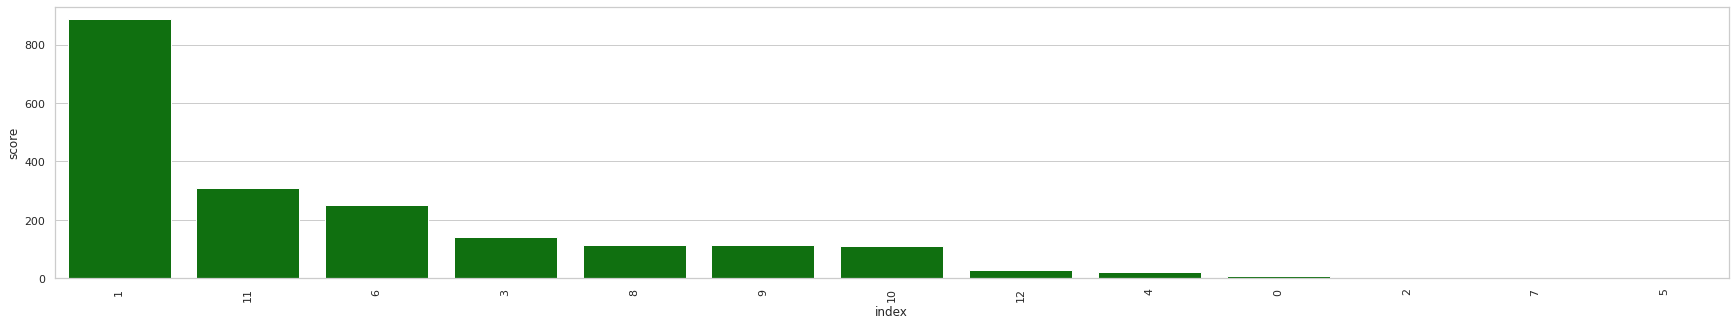

In [171]:
plt.figure(figsize=(30,5))
sns.barplot(scores['index'], scores.score,  order=scores['index'], color='green')
plt.xticks(rotation=90)
plt.show()

In [235]:
#Aqui fica definida a quantidade de features que seguem na análise
scores_select = scores[scores['index'].isin(np.where(fs.scores_>150)[0])]
score_qttd = scores_select.shape[0]
score_qttd

3

In [236]:
# Definida a quantidade de features, o SelectKBest pode ser rodado novamente
fs = SelectKBest(score_func=f_classif, k=score_qttd)
fs.fit(df_feat[feat_trans],df2['Exited'])
df_best_feat = pd.DataFrame(fs.transform(df_feat), columns=scores['feat_name'][:score_qttd])

In [237]:
df_best_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                10000 non-null  float64
 1   Geography_Germany  10000 non-null  float64
 2   IsActiveMember     10000 non-null  float64
dtypes: float64(3)
memory usage: 234.5 KB


### 3.4 Construção do modelo

In [238]:
# seu código
X_train, X_test, y_train, y_test = train_test_split(df_best_feat, df2['Exited'] , test_size=0.20, random_state = 42)

In [239]:
# seu código
rfc = RandomForestClassifier()
rfc.fit (X_train, y_train)
y_pred = rfc.predict(X_test)

### 3.5 Avaliação do modelo

In [240]:
# seu código
pd.DataFrame(y_pred).value_counts()

0    1831
1     169
dtype: int64

In [245]:
rfc.score(X_test, y_test)

0.84

In [252]:
#AUC
roc_auc_score(y_test, y_pred)

0.639009359497491

Test set accuracy: 0.84 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


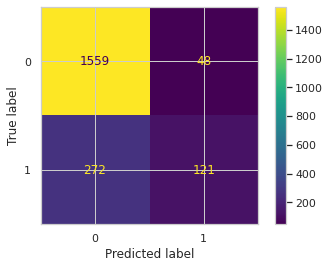

In [254]:
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f} \n".format(acc))

plot_confusion_matrix(rfc, X_test, y_test)  
plt.show()

### 3.4 Otimização do modelo

In [280]:
# seu código
from imblearn.over_sampling import SMOTE

In [281]:
# seu código
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_train, y_train)

In [282]:
print(y_train.value_counts())
print(y_resampled.value_counts())

0    6356
1    1644
Name: Exited, dtype: int64
0    6356
1    6356
Name: Exited, dtype: int64


In [283]:
# seu código
rfc = RandomForestClassifier()
rfc.fit (X_resampled, y_resampled)
y_pred = rfc.predict(X_test)

In [284]:
rfc.score(X_test, y_test)

0.7315

## 4. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após a avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. 

Você pode, por exemplo, remover variáveis/atributos menos importantes, normalizar variáveis importantes e escolher outros algoritmos de aprendizagem supervisionada. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.